# Introduction

## Binary Search

- Only for sorted elements

In [7]:
def binary_search(ls, target):
    low = 0
    high = len(ls) - 1
    while low <= high:
        mid = (low + high)//2
        guess = ls[mid]
        if guess == target:
            return mid
        if guess > target:
            high = mid - 1
        else:
            low = mid + 1
    return None 

In [8]:
my_list = [1, 3, 5, 7, 9]

In [9]:
binary_search(my_list, 7)

3

## The traveling salesperson

- Go to five citites with minimum distance

- O(n!)

# Selection Sort

## Linked List

- Hard to access (can’t instantly calculate the position of element we want to get)

- Easy to save in memory

- Easy to insert/delete an element: O(1)

## Array

- Easy to access (read random element)

- Hard to save in memory (waste memory, reassign memory)

- Complex to insert/delete: O(n)

## Algorithm

- Pick the extrem of the list, move it to another list

- Repeat the same operation to the sublist

In [1]:
arr = [10,1,40,6]

In [3]:
def findSmallest(arr):
    smallest = arr[0]
    smallest_index = 0
    for i in range(1,len(arr)):
        if arr[i] < smallest:
            smallest = arr[i]
            smallest_index = i
    return smallest_index

In [5]:
def selectionSort(arr):
    newArr = []
    for i in range(len(arr)):
        smallest_index = findSmallest(arr)
        newArr.append(arr.pop(smallest_index))
    return newArr

In [6]:
selectionSort(arr)

[1, 6, 10, 40]

# Recursion

- a function call itself

- base case and a recursive case

- divide and conquer strategy

## Countdown

In [9]:
def countDown(n):
    print(n)
    if n <= 0: # base case
        return
    else: # recursive case
        countDown(n-1)

In [10]:
countDown(10)

10
9
8
7
6
5
4
3
2
1
0


## Call Stack

- partially completed. 

    - when you call a function from another function, the calling function is paused in a partially completed state.

### The call stack with recursion

#### Factorial

In [24]:
def factorial(x):
    if x == 0:
        return 1
    else:
        return factorial(x-1) * x

In [25]:
factorial(5)

120

### Tail-call optimization

- To avoid allocating a new stack frame for a function because the calling function will simply return the value that it gets from the called function. 

- The most common use is tail-recursion, where a recursive function written to take advantage of tail-call optimization can use constant stack space.

### Pyramid

In [23]:
def pyramid(n):
    print("\nprint a pyramid\n")
    for i in range(n):
        print(' '*(n-i)+'*'*(i*2-1)+' '*(n-i))

In [24]:
pyramid(5)


print a pyramid

          
    *    
   ***   
  *****  
 ******* 


# Quicksort

## Divide and Conquer

- To solve a problem using D&C:

    1. Figure out the base case. This should be the simplest possible case.

    2. Divide or decrease your problem until it becomes the base case.

### [Euclid’s algorith](https://www.khanacademy.org/computing/computer-science/cryptography/modarithmetic/a/the-euclidean-algorithm)

- The Euclidean Algorithm is a technique for quickly finding the GCD of two integers.
    
    1. If A = 0 then GCD(A,B)=B, since the GCD(0,B)=B, and we can stop.  
    
    2. If B = 0 then GCD(A,B)=A, since the GCD(A,0)=A, and we can stop.  

    3. Write A in quotient remainder form (A = B⋅Q + R)

    4. Find GCD(B,R) using the Euclidean Algorithm since GCD(A,B) = GCD(B,R)

- Property:

    1. GCD(A,0) = A

    2. GCD(0,B) = B

    3. If A = B⋅Q + R and B≠0 then GCD(A,B) = GCD(B,R) where Q is an integer, R is an integer between 0 and B-1
    
    4. For A = B + C, GCD(B,C) % A = 0 and GCD(A,B) % C = 0  

- GCD(A,B)=GCD(B,R), proof:
    
    1. Proof that GCD(A,B)=GCD(B,A-B)
    
        A. Proof that the GCD(A,B) evenly divides C = A-B
        
        B. Proof that the GCD(B,C) evenly divides A
        
        C. Proof that GCD(A,B) = GCD(B,A-B)

    2. Proof that GCD(A,B)=GCD(B,A-B⋅Q)

### Example 1: divide farm (1680 $\times$ 640) evenly into square plots

1. reduce the problem from a 1680 × 640 farm to a 640 × 400 farm

2. reduce 640 × 400 to 240 × 400

3. reduce 240 × 400 to 160 × 240

4. reduce 160 × 240 to $\underline{\text{80 × 160}}$ $\Rightarrow$ Base Case !

### Sneak peak at functional programming

### Example 2: Add Up An Array

In [14]:
arr = [2,4,6]

In [16]:
def sumRec(arr):
    if len(arr) == 0:
        return 0
    else:
        return arr[0] + sumRec(arr[1:])

In [17]:
sumRec(arr)

12

### Q1: Count the number of items in a list

In [18]:
ls = [1,2,3,4]

In [19]:
def countList(ls):
    if len(ls) == 0:
        return 0
    else:
        return 1 + len(ls[1:])

In [20]:
countList(ls)

4

### Q2: Find the maximum number in a list.

In [18]:
ls = [2,3,4,1]

In [27]:
def maxRec1(ls):
    if len(ls) > 1:
        if len(ls) == 2:
            return ls[0] if ls[0] > ls[1] else ls[1]
        else:
            return maxRec1(ls[1:])
    else:
        return ls[0] if len(ls) == 1 else ls

In [28]:
maxRec1(ls)

4

In [29]:
def maxRec2(ls):
    if len(ls) > 1:
        if len(ls) == 2:
                return ls[0] if ls[0] > ls[1] else ls[1]
        sub_max = maxRec2(ls[1:])
        return ls[0] if ls[0] > sub_max else sub_max
    else:
        return ls[0] if len(ls) == 1 else ls

In [30]:
maxRec2(ls)

4

### Q3. The base case and recursive case for binary search?

- The base case: an array with one item. If the item you’re looking for matches the item in the array, you found it! Otherwise, it isn’t in the array. 

- The recursive case: split the array in half, throw away one half, and call binary search on the other half.

## Quicksort

C standard library: qsort

- Base case: Empty arrays and arrays with just one element. (return directly)


- Break down array to base case:

    1. pick pivot
    
    2. partitioning
    
        - find the elements smaller than the pivot and the elements larger than the pivot
        
        - Now, we have:
        
            - A sub-array of all the numbers less than the pivot

            - The pivot

            - A sub-array of all the numbers greater than the pivot
            
        - Next to do:
        
            - sort each sub-array
            
            - combine them with pivot
    
    3. call quick sort on each sub-array


In [1]:
ls = [2,1,5,3,4]

In [9]:
def quickSort(ls):
    if len(ls) > 0: 
        if len(ls) == 1:
            return ls
        else:
            pivot = ls[0]
            less = [item for item in ls[1:] if item <= pivot]
            greater = [item for item in ls[1:] if item > pivot]
            return quickSort(less) + [pivot] + quickSort(greater)
    else:
        return ls

In [10]:
quickSort(ls)

[1, 2, 3, 4, 5]

## Inductive proofs

- Base case: arrays of size 0 and 1. 

- Inductive case: if quicksort works for an array of size 1, it will work for an array of size 2. And if it works for arrays of size 2, it will work for arrays of size 3, and so on.

## Merge sort

1. Split the unsorted list into groups recursively until there is one element per group

2. Compare each of the elements and then group them 

3. Repeat step 2 until the whole list is merged and sorted in the process

4. Check the remaining elements in both left side and right side.

In [1]:
def mergeSort(alist):
    print("Splitting ",alist)
    if len(alist)>1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]

        mergeSort(lefthalf)
        mergeSort(righthalf)

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                alist[k]=lefthalf[i]
                i=i+1
            else:
                alist[k]=righthalf[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):
            alist[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            alist[k]=righthalf[j]
            j=j+1
            k=k+1
    print("Merging ",alist)

In [2]:
alist = [54,26,93,17,77,31,44,55,20]

In [3]:
mergeSort(alist)

Splitting  [54, 26, 93, 17, 77, 31, 44, 55, 20]
Splitting  [54, 26, 93, 17]
Splitting  [54, 26]
Splitting  [54]
Merging  [54]
Splitting  [26]
Merging  [26]
Merging  [26, 54]
Splitting  [93, 17]
Splitting  [93]
Merging  [93]
Splitting  [17]
Merging  [17]
Merging  [17, 93]
Merging  [17, 26, 54, 93]
Splitting  [77, 31, 44, 55, 20]
Splitting  [77, 31]
Splitting  [77]
Merging  [77]
Splitting  [31]
Merging  [31]
Merging  [31, 77]
Splitting  [44, 55, 20]
Splitting  [44]
Merging  [44]
Splitting  [55, 20]
Splitting  [55]
Merging  [55]
Splitting  [20]
Merging  [20]
Merging  [20, 55]
Merging  [20, 44, 55]
Merging  [20, 31, 44, 55, 77]
Merging  [17, 20, 26, 31, 44, 54, 55, 77, 93]


In [4]:
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


## Merge sort vs. quicksort

- Quicksort has a smaller constant than merge sort. So if they’re both O(n log n) time, quicksort is faster.

-  quicksort is faster in practice because it hits the average case way more often than the worst case.

## Average case vs. worst case

- quicksort: heavily depends on the pivot

    - may choose to sort a sorted array if the pivot starts from the largest/smallest
    
    - worst case:
        - O(n) stacks, each cost O(n) operations $\Rightarrow O(n^2)$
        
    - best case:
        - O($\log n$) stacks, each cost O(n) operations $\Rightarrow O(n\log n)$

    - average case(pick pivot randomly):
        - O($n\log n$)

# Hash

## Hash Function

A hash function is a function where you put in a string1 and you get back a number.

- requirements for a hash function:

    1. It needs to be consistent.
    
    2. It should map different words to different numbers.
    
- With hash table, no need to search since,

    1. The hash function consistently maps a name to the same index.

    2. The hash function maps different strings to different indexes.
    
    3. The hash function knows how big your array is and only returns valid indexes.

## Use cases

### Using hash tables for lookups

### Preventing duplicate entries

In [1]:
voted ={}

In [2]:
def check_voter(voted, name):
    if voted.get(name):
        print("kick " + name + " out!")
    else:
        voted[name] = True
        print("let " + name + " vote!")

### Using hash tables as a cache

## Collisions

- two keys have been assigned the same slot.

    - if multiple keys map to the same slot, start a linked list at that slot.
    
    - choose good hash function

## Performance

- No matter whether your hash table has 1 element or 1 billion elements—getting something out of a hash table will take the same amount of time.

- In worst case,collision, all O(n)


- Solution:

    • A low load factor

    • A good hash function

### Load Factor

$\Large\frac{\text{Number of items in hash table}}{\text{Total number of slots}}$ 

- Resizing

### A good hash function

A good hash function distributes values in the array evenly.

# breadth-first search

- abstract data structure: graphs.
    
- the shortest path to go to X?

- directed vs. undirected graphs

- topological sort, a different kind of sorting algorithm that exposes dependencies between nodes.

With BFS:

- find the shortest distance between two things.

- write a checkers AI that 

    - calculates the fewest moves to victory

- write a spell checker 
    
    - (fewest edits from your misspelling to a real word—for example, READED -> READER is one edit)
    
- find the doctor closest to you in your network

## Introduction to graphs

In [2]:
from IPython.display import display
from PIL import Image

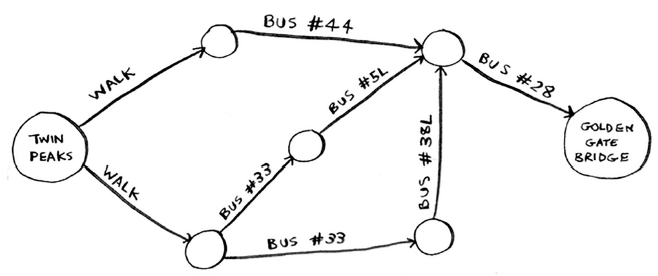

In [7]:
path="D:\Algorithm\Python\GA\GGB.PNG"
display(Image.open(path))

- Model the problem as a graph.

- Solve the problem using breadth-first search.

## What is a graph?

- Node

- Edge

- Neighbor

## Breadth-first search

- Question type 1: Is there a path from node A to node B?

- Question type 2: What is the shortest path from node A to node B?

Search -> Firend -> Firend's firend ...

- first-degree connections are added to the search list before second-degree connections

- make sure to search people in the order that they’re added

### Queue

- queue, FIFO data structure: First In, First Out. In

- stack, LIFO data structure: Last In, First Out.